In [28]:
import pandas as Ht_De_Ptn_Pd
Ht_De_Ptn_Pre = Ht_De_Ptn_Pd.read_csv("pre_proc_heart_disease_dataset2.csv")
Ht_De_Ptn_Pre.shape

(299, 16)

In [29]:
import warnings as Ht_De_Ptn_Pre_wrngs
Ht_De_Ptn_Pre_wrngs.filterwarnings("ignore")

In [30]:
# Splitting dataset @ Training - 60%, Validation - 20% and Testing - 20%

In [31]:
Ht_De_Ptn_Pre_X = Ht_De_Ptn_Pre.drop('num',axis=1)
Ht_De_Ptn_Pre_Y = Ht_De_Ptn_Pre['num']

In [32]:
from sklearn.model_selection import train_test_split as Ht_De_Ptn_Splt
Ht_De_Ptn_Xtr, Ht_De_Ptn_Xts, Ht_De_Ptn_Ytr, Ht_De_Ptn_Yts = Ht_De_Ptn_Splt(Ht_De_Ptn_Pre_X, Ht_De_Ptn_Pre_Y, test_size=0.40, random_state= 42)
print("Heart Disease Data Count - Training:", Ht_De_Ptn_Xtr.shape)

Heart Disease Data Count - Training: (179, 15)


In [33]:
## Testing and Validation Heart Disease Dataset = 40% (20-20) ##
Ht_De_Ptn_Xvl, Ht_De_Ptn_Xts, Ht_De_Ptn_Yvl, Ht_De_Ptn_Yts = Ht_De_Ptn_Splt(Ht_De_Ptn_Xts, Ht_De_Ptn_Yts, test_size= 0.5, random_state= 42)
print("Heart Disease Data Count - Testing:", Ht_De_Ptn_Xts.shape)
print("Heart Disease Data Count - Validating:", Ht_De_Ptn_Xvl.shape)

Heart Disease Data Count - Testing: (60, 15)
Heart Disease Data Count - Validating: (60, 15)


In [34]:
# Combined Models (SVM & RF)

In [35]:
from sklearn.metrics import classification_report as Ht_De_Ptn_Cfrt
from sklearn.metrics import confusion_matrix as Ht_De_Ptn_Cfmx
from sklearn.metrics import ConfusionMatrixDisplay as Ht_De_Ptn_Cfmxdy
from sklearn.model_selection import GridSearchCV as Ht_De_Ptn_Gdscv
from sklearn.ensemble import VotingClassifier
import time as Ht_De_Ptn_tme

In [36]:
from sklearn.svm import SVC as Ht_De_Ptn_SuVeCr
from sklearn.ensemble import RandomForestClassifier as Ht_De_Ptn_RmFtCr

Ht_De_Ptn_VChp = {'voting': ['hard', 'soft']}

SVM_params = {'C': [0.1], 'gamma': ['scale'],'kernel': ['rbf']}
RF_params = {'max_depth': [None], 'max_features': ['sqrt'], 'min_samples_split': [2], 'n_estimators': [200]}

Ht_De_Ptn_SuVeCrmd = Ht_De_Ptn_SuVeCr()
Ht_De_Ptn_RmFtCrmd = Ht_De_Ptn_RmFtCr()

# GridSearchCV for SVM and RF Classifier
Ht_De_Ptn_SVCGrid = Ht_De_Ptn_Gdscv(Ht_De_Ptn_SuVeCrmd, SVM_params, cv=2, verbose=1)
Ht_De_Ptn_SVCGrid.fit(Ht_De_Ptn_Xtr.sample(50, random_state=42), Ht_De_Ptn_Ytr.sample(50, random_state=42))

Ht_De_Ptn_RFGrid = Ht_De_Ptn_Gdscv(Ht_De_Ptn_RmFtCrmd, RF_params, cv=2, verbose=1)
Ht_De_Ptn_RFGrid.fit(Ht_De_Ptn_Xtr.sample(50, random_state=42), Ht_De_Ptn_Ytr.sample(50, random_state=42))

# Combined models using Voting Classifier
Ht_De_Ptn_Votmd = VotingClassifier(estimators=[('SVM', Ht_De_Ptn_SVCGrid.best_estimator_), ('RF', Ht_De_Ptn_RFGrid.best_estimator_)])

Ht_De_Ptn_Vtmd = Ht_De_Ptn_Gdscv(Ht_De_Ptn_Votmd, Ht_De_Ptn_VChp, cv=2, verbose=1)
Ht_De_Ptn_Vtmd.fit(Ht_De_Ptn_Xtr.sample(50, random_state=42), Ht_De_Ptn_Ytr.sample(50, random_state=42))

print(Ht_De_Ptn_Vtmd.best_params_)
print("The GSV score of combined SVM and RF models:", Ht_De_Ptn_Vtmd.best_score_)


Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 2 candidates, totalling 4 fits
{'voting': 'hard'}
The GSV score of combined SVM and RF models: 0.64


In [37]:
Ht_De_Ptn_tt = Ht_De_Ptn_tme.time()

Ht_De_Ptn_VtmdClr = VotingClassifier(estimators=[('SVC', Ht_De_Ptn_SVCGrid.best_estimator_), ('RF', Ht_De_Ptn_RFGrid.best_estimator_)], voting='hard')
Ht_De_Ptn_VtmdClr.fit(Ht_De_Ptn_Xtr, Ht_De_Ptn_Ytr)

Ht_De_Ptn_tt1 = Ht_De_Ptn_tme.time()
print("Time to train:", Ht_De_Ptn_tt1-Ht_De_Ptn_tt)

Time to train: 0.20348858833312988


              precision    recall  f1-score   support

           0       0.55      1.00      0.71        33
           1       0.00      0.00      0.00        27

    accuracy                           0.55        60
   macro avg       0.28      0.50      0.35        60
weighted avg       0.30      0.55      0.39        60

Time to validate: 0.02613210678100586


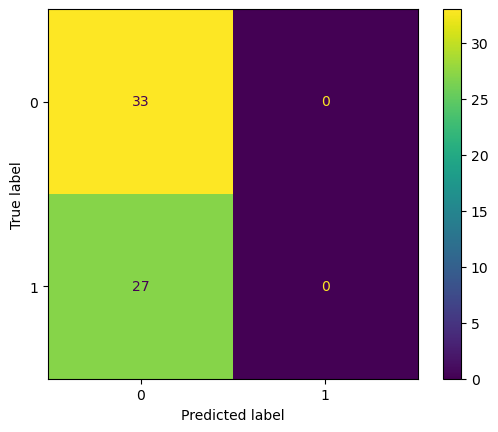

In [38]:
Ht_De_Ptn_tt = Ht_De_Ptn_tme.time()

Ht_De_Ptn_VtmdClr1 = Ht_De_Ptn_VtmdClr.predict(Ht_De_Ptn_Xvl)
print(Ht_De_Ptn_Cfrt(Ht_De_Ptn_Yvl, Ht_De_Ptn_VtmdClr1))

Ht_De_Ptn_tt1 = Ht_De_Ptn_tme.time()
Ht_De_Ptn_XX = Ht_De_Ptn_Cfmx(Ht_De_Ptn_Yvl, Ht_De_Ptn_VtmdClr1)
Ht_De_Ptn_YY = Ht_De_Ptn_Cfmxdy(confusion_matrix = Ht_De_Ptn_XX, display_labels = [0, 1])
Ht_De_Ptn_YY.plot()
print("Time to validate:", Ht_De_Ptn_tt1-Ht_De_Ptn_tt)

              precision    recall  f1-score   support

           0       0.53      1.00      0.70        32
           1       0.00      0.00      0.00        28

    accuracy                           0.53        60
   macro avg       0.27      0.50      0.35        60
weighted avg       0.28      0.53      0.37        60

Time to test: 0.02325892448425293


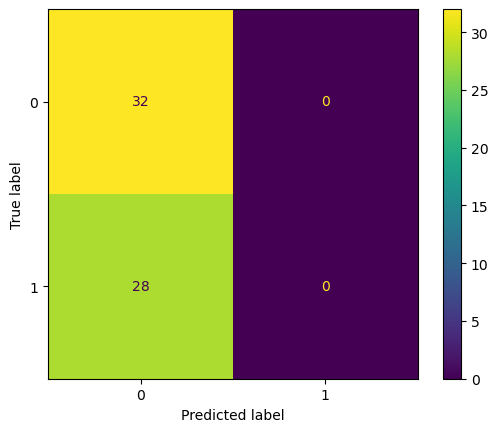

In [39]:
Ht_De_Ptn_tt = Ht_De_Ptn_tme.time()

Ht_De_Ptn_VtmdClr2 = Ht_De_Ptn_VtmdClr.predict(Ht_De_Ptn_Xts)
print(Ht_De_Ptn_Cfrt(Ht_De_Ptn_Yts, Ht_De_Ptn_VtmdClr2))

Ht_De_Ptn_tt1 = Ht_De_Ptn_tme.time()
Ht_De_Ptn_XX = Ht_De_Ptn_Cfmx(Ht_De_Ptn_Yts, Ht_De_Ptn_VtmdClr2)
Ht_De_Ptn_YY = Ht_De_Ptn_Cfmxdy(confusion_matrix = Ht_De_Ptn_XX, display_labels = [0, 1])
Ht_De_Ptn_YY.plot()
print("Time to test:", Ht_De_Ptn_tt1-Ht_De_Ptn_tt)

In [13]:
# Combined Models (RF & MLP)

In [40]:
from sklearn.ensemble import RandomForestClassifier as Ht_De_Ptn_RmFtCr
from sklearn.neural_network import MLPClassifier as Ht_De_Ptn_MLPCr

Ht_De_Ptn_VChp = {'voting': ['hard', 'soft']}

RF_params = {'max_depth': [None], 'max_features': ['sqrt'], 'min_samples_split': [2], 'n_estimators': [200]}
MLP_params = {'activation': ['tanh'], 'alpha': [0.0001], 'learning_rate': ['adaptive'], 'max_iter': [300], 'solver': ['sgd']}

Ht_De_Ptn_RmFtCrmd = Ht_De_Ptn_RmFtCr()
Ht_De_Ptn_MLPCrmd = Ht_De_Ptn_MLPCr()

# GridSearchCV for RF and MLP Classifier
Ht_De_Ptn_RFGrid = Ht_De_Ptn_Gdscv(Ht_De_Ptn_RmFtCrmd, RF_params, cv=2, verbose=1)
Ht_De_Ptn_RFGrid.fit(Ht_De_Ptn_Xtr.sample(50, random_state=42), Ht_De_Ptn_Ytr.sample(50, random_state=42))

Ht_De_Ptn_MLPGrid = Ht_De_Ptn_Gdscv(Ht_De_Ptn_MLPCrmd, MLP_params, cv=2, verbose=1)
Ht_De_Ptn_MLPGrid.fit(Ht_De_Ptn_Xtr.sample(50, random_state=42), Ht_De_Ptn_Ytr.sample(50, random_state=42))

# Combined models using Voting Classifier
Ht_De_Ptn_Votmd = VotingClassifier(estimators=[('RF', Ht_De_Ptn_RFGrid.best_estimator_), ('MLP', Ht_De_Ptn_MLPGrid.best_estimator_)])

Ht_De_Ptn_Vtmd = Ht_De_Ptn_Gdscv(Ht_De_Ptn_Votmd, Ht_De_Ptn_VChp, cv=2, verbose=1)
Ht_De_Ptn_Vtmd.fit(Ht_De_Ptn_Xtr.sample(50, random_state=42), Ht_De_Ptn_Ytr.sample(50, random_state=42))

print(Ht_De_Ptn_Vtmd.best_params_)
print("The GSV score of combined RF and MLP models:", Ht_De_Ptn_Vtmd.best_score_)

Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 2 candidates, totalling 4 fits
{'voting': 'hard'}
The GSV score of combined RF and MLP models: 0.78


In [41]:
Ht_De_Ptn_tt = Ht_De_Ptn_tme.time()

Ht_De_Ptn_VtmdClr = VotingClassifier(estimators=[('RF', Ht_De_Ptn_RFGrid.best_estimator_), ('MLP', Ht_De_Ptn_MLPGrid.best_estimator_)], voting='hard')
Ht_De_Ptn_VtmdClr.fit(Ht_De_Ptn_Xtr, Ht_De_Ptn_Ytr)

Ht_De_Ptn_tt1 = Ht_De_Ptn_tme.time()
print("Time to train:", Ht_De_Ptn_tt1-Ht_De_Ptn_tt)

Time to train: 0.31535816192626953


              precision    recall  f1-score   support

           0       0.67      0.91      0.77        33
           1       0.80      0.44      0.57        27

    accuracy                           0.70        60
   macro avg       0.73      0.68      0.67        60
weighted avg       0.73      0.70      0.68        60

Time to validate: 0.038015127182006836


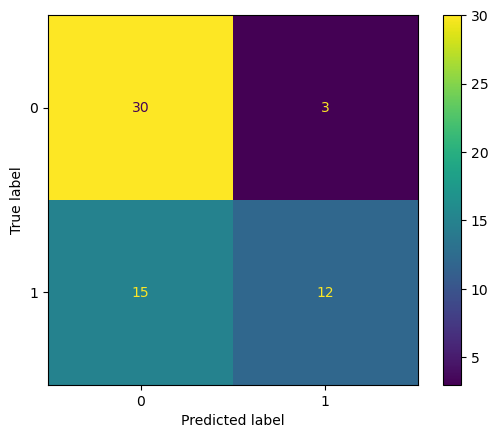

In [42]:
Ht_De_Ptn_tt = Ht_De_Ptn_tme.time()

Ht_De_Ptn_VtmdClr1 = Ht_De_Ptn_VtmdClr.predict(Ht_De_Ptn_Xvl)
print(Ht_De_Ptn_Cfrt(Ht_De_Ptn_Yvl, Ht_De_Ptn_VtmdClr1))

Ht_De_Ptn_tt1 = Ht_De_Ptn_tme.time()
Ht_De_Ptn_XX = Ht_De_Ptn_Cfmx(Ht_De_Ptn_Yvl, Ht_De_Ptn_VtmdClr1)
Ht_De_Ptn_YY = Ht_De_Ptn_Cfmxdy(confusion_matrix = Ht_De_Ptn_XX, display_labels = [0, 1])
Ht_De_Ptn_YY.plot()
print("Time to validate:", Ht_De_Ptn_tt1-Ht_De_Ptn_tt)

              precision    recall  f1-score   support

           0       0.74      0.97      0.84        32
           1       0.94      0.61      0.74        28

    accuracy                           0.80        60
   macro avg       0.84      0.79      0.79        60
weighted avg       0.83      0.80      0.79        60

Time to test: 0.040198326110839844


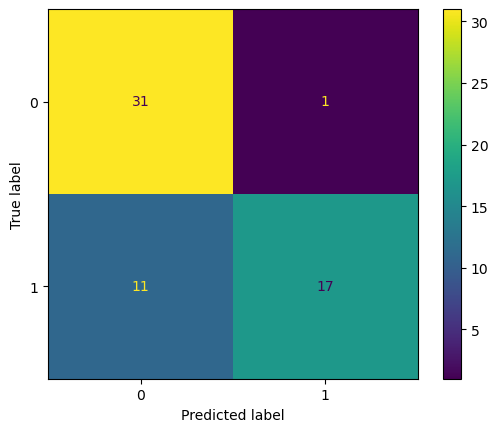

In [43]:
Ht_De_Ptn_tt = Ht_De_Ptn_tme.time()

Ht_De_Ptn_VtmdClr2 = Ht_De_Ptn_VtmdClr.predict(Ht_De_Ptn_Xts)
print(Ht_De_Ptn_Cfrt(Ht_De_Ptn_Yts, Ht_De_Ptn_VtmdClr2))

Ht_De_Ptn_tt1 = Ht_De_Ptn_tme.time()
Ht_De_Ptn_XX = Ht_De_Ptn_Cfmx(Ht_De_Ptn_Yts, Ht_De_Ptn_VtmdClr2)
Ht_De_Ptn_YY = Ht_De_Ptn_Cfmxdy(confusion_matrix = Ht_De_Ptn_XX, display_labels = [0, 1])
Ht_De_Ptn_YY.plot()
print("Time to test:", Ht_De_Ptn_tt1-Ht_De_Ptn_tt)

In [44]:
# Combined Models (MLP & DT)

In [45]:
from sklearn.tree import DecisionTreeClassifier as Ht_De_Ptn_DnTeCr
from sklearn.neural_network import MLPClassifier as Ht_De_Ptn_MLPCr

Ht_De_Ptn_VChp = {'voting': ['hard', 'soft']}

DT_params = {'criterion': ['gini'], 'max_depth': [20], 'min_samples_leaf': [2], 'min_samples_split': [3]}
MLP_params = {'activation': ['tanh'], 'alpha': [0.0001], 'learning_rate': ['adaptive'], 'max_iter': [300], 'solver': ['sgd']}

Ht_De_Ptn_DnTeCrmd = Ht_De_Ptn_DnTeCr()
Ht_De_Ptn_MLPCrmd = Ht_De_Ptn_MLPCr()

# GridSearchCV for RF and MLP Classifier
Ht_De_Ptn_MLPGrid = Ht_De_Ptn_Gdscv(Ht_De_Ptn_MLPCrmd, MLP_params, cv=2, verbose=1)
Ht_De_Ptn_MLPGrid.fit(Ht_De_Ptn_Xtr.sample(50, random_state=42), Ht_De_Ptn_Ytr.sample(50, random_state=42))

Ht_De_Ptn_DTGrid = Ht_De_Ptn_Gdscv(Ht_De_Ptn_DnTeCrmd, DT_params, cv=2, verbose=1)
Ht_De_Ptn_DTGrid.fit(Ht_De_Ptn_Xtr.sample(50, random_state=42), Ht_De_Ptn_Ytr.sample(50, random_state=42))

# Combined models using Voting Classifier
Ht_De_Ptn_Votmd = VotingClassifier(estimators=[('MLP', Ht_De_Ptn_MLPGrid.best_estimator_), ('DT', Ht_De_Ptn_DTGrid.best_estimator_)])

Ht_De_Ptn_Vtmd = Ht_De_Ptn_Gdscv(Ht_De_Ptn_Votmd, Ht_De_Ptn_VChp, cv=2, verbose=1)
Ht_De_Ptn_Vtmd.fit(Ht_De_Ptn_Xtr.sample(50, random_state=42), Ht_De_Ptn_Ytr.sample(50, random_state=42))

print(Ht_De_Ptn_Vtmd.best_params_)
print("The GSV score of combined MLP and DT models:", Ht_De_Ptn_Vtmd.best_score_)

Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 2 candidates, totalling 4 fits
{'voting': 'soft'}
The GSV score of combined MLP and DT models: 0.76


In [46]:
Ht_De_Ptn_tt = Ht_De_Ptn_tme.time()

Ht_De_Ptn_VtmdClr = VotingClassifier(estimators=[('MLP', Ht_De_Ptn_MLPGrid.best_estimator_), ('DT', Ht_De_Ptn_DTGrid.best_estimator_)], voting='soft')
Ht_De_Ptn_VtmdClr.fit(Ht_De_Ptn_Xtr, Ht_De_Ptn_Ytr)

Ht_De_Ptn_tt1 = Ht_De_Ptn_tme.time()
print("Time to train:", Ht_De_Ptn_tt1-Ht_De_Ptn_tt)

Time to train: 0.1404285430908203


              precision    recall  f1-score   support

           0       0.77      0.82      0.79        33
           1       0.76      0.70      0.73        27

    accuracy                           0.77        60
   macro avg       0.77      0.76      0.76        60
weighted avg       0.77      0.77      0.77        60

Time to validate: 0.008514404296875


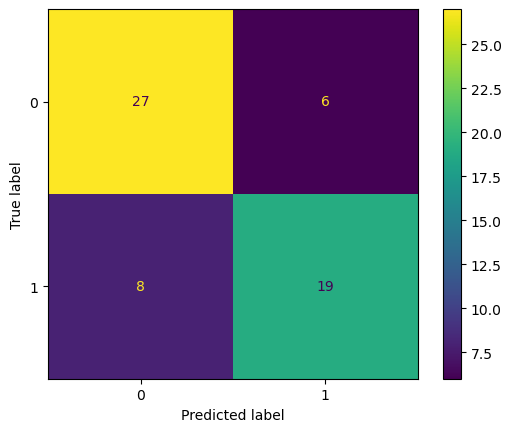

In [47]:
Ht_De_Ptn_tt = Ht_De_Ptn_tme.time()

Ht_De_Ptn_VtmdClr1 = Ht_De_Ptn_VtmdClr.predict(Ht_De_Ptn_Xvl)
print(Ht_De_Ptn_Cfrt(Ht_De_Ptn_Yvl, Ht_De_Ptn_VtmdClr1))

Ht_De_Ptn_tt1 = Ht_De_Ptn_tme.time()
Ht_De_Ptn_XX = Ht_De_Ptn_Cfmx(Ht_De_Ptn_Yvl, Ht_De_Ptn_VtmdClr1)
Ht_De_Ptn_YY = Ht_De_Ptn_Cfmxdy(confusion_matrix = Ht_De_Ptn_XX, display_labels = [0, 1])
Ht_De_Ptn_YY.plot()
print("Time to validate:", Ht_De_Ptn_tt1-Ht_De_Ptn_tt)

              precision    recall  f1-score   support

           0       0.89      0.78      0.83        32
           1       0.78      0.89      0.83        28

    accuracy                           0.83        60
   macro avg       0.84      0.84      0.83        60
weighted avg       0.84      0.83      0.83        60

Time to test: 0.008177042007446289


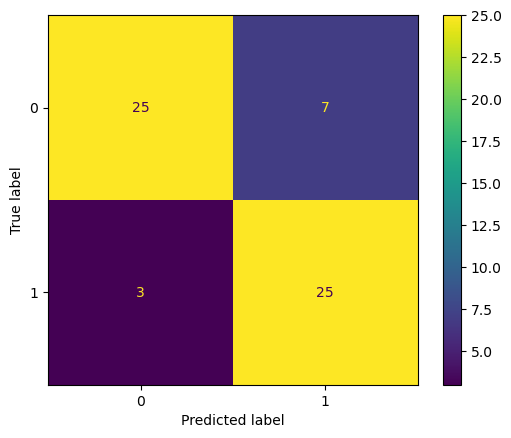

In [48]:
Ht_De_Ptn_tt = Ht_De_Ptn_tme.time()

Ht_De_Ptn_VtmdClr2 = Ht_De_Ptn_VtmdClr.predict(Ht_De_Ptn_Xts)
print(Ht_De_Ptn_Cfrt(Ht_De_Ptn_Yts, Ht_De_Ptn_VtmdClr2))

Ht_De_Ptn_tt1 = Ht_De_Ptn_tme.time()
Ht_De_Ptn_XX = Ht_De_Ptn_Cfmx(Ht_De_Ptn_Yts, Ht_De_Ptn_VtmdClr2)
Ht_De_Ptn_YY = Ht_De_Ptn_Cfmxdy(confusion_matrix = Ht_De_Ptn_XX, display_labels = [0, 1])
Ht_De_Ptn_YY.plot()
print("Time to test:", Ht_De_Ptn_tt1-Ht_De_Ptn_tt)

In [23]:
# Combined Models (DT & SVM)

In [49]:
from sklearn.tree import DecisionTreeClassifier as Ht_De_Ptn_DnTeCr
from sklearn.svm import SVC as Ht_De_Ptn_SuVeCr

Ht_De_Ptn_VChp = {'voting': ['hard', 'soft']}

DT_params = {'criterion': ['gini'], 'max_depth': [20], 'min_samples_leaf': [2], 'min_samples_split': [3]}
SVM_params = {'C': [0.1], 'gamma': ['scale'], 'kernel': ['rbf']}

Ht_De_Ptn_DnTeCrmd = Ht_De_Ptn_DnTeCr()
Ht_De_Ptn_SuVeCrmd = Ht_De_Ptn_SuVeCr()

# GridSearchCV for RF and MLP Classifier
Ht_De_Ptn_DTGrid = Ht_De_Ptn_Gdscv(Ht_De_Ptn_DnTeCrmd, DT_params, cv=2, verbose=1)
Ht_De_Ptn_DTGrid.fit(Ht_De_Ptn_Xtr.sample(50, random_state=42), Ht_De_Ptn_Ytr.sample(50, random_state=42))

Ht_De_Ptn_SVCGrid = Ht_De_Ptn_Gdscv(Ht_De_Ptn_SuVeCrmd, SVM_params, cv=2, verbose=1)
Ht_De_Ptn_SVCGrid.fit(Ht_De_Ptn_Xtr.sample(50, random_state=42), Ht_De_Ptn_Ytr.sample(50, random_state=42))

# Combined models using Voting Classifier
Ht_De_Ptn_Votmd = VotingClassifier(estimators=[('DT', Ht_De_Ptn_DTGrid.best_estimator_), ('SVM', Ht_De_Ptn_SVCGrid.best_estimator_)])

Ht_De_Ptn_Vtmd = Ht_De_Ptn_Gdscv(Ht_De_Ptn_Votmd, Ht_De_Ptn_VChp, cv=2, verbose=1)
Ht_De_Ptn_Vtmd.fit(Ht_De_Ptn_Xtr.sample(50, random_state=42), Ht_De_Ptn_Ytr.sample(50, random_state=42))

print(Ht_De_Ptn_Vtmd.best_params_)
print("The GSV score of combined DT and SVM models:", Ht_De_Ptn_Vtmd.best_score_)

Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 2 candidates, totalling 4 fits
{'voting': 'hard'}
The GSV score of combined DT and SVM models: 0.64


In [50]:
Ht_De_Ptn_tt = Ht_De_Ptn_tme.time()

Ht_De_Ptn_VtmdClr = VotingClassifier(estimators=[('DT', Ht_De_Ptn_DTGrid.best_estimator_), ('SVM', Ht_De_Ptn_SVCGrid.best_estimator_)], voting='hard')
Ht_De_Ptn_VtmdClr.fit(Ht_De_Ptn_Xtr, Ht_De_Ptn_Ytr)

Ht_De_Ptn_tt1 = Ht_De_Ptn_tme.time()
print("Time to train:", Ht_De_Ptn_tt1-Ht_De_Ptn_tt)

Time to train: 0.007893800735473633


              precision    recall  f1-score   support

           0       0.55      1.00      0.71        33
           1       0.00      0.00      0.00        27

    accuracy                           0.55        60
   macro avg       0.28      0.50      0.35        60
weighted avg       0.30      0.55      0.39        60

Time to validate: 0.008984088897705078


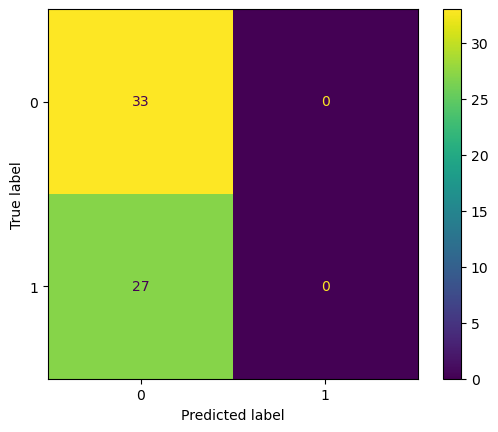

In [51]:
Ht_De_Ptn_tt = Ht_De_Ptn_tme.time()

Ht_De_Ptn_VtmdClr1 = Ht_De_Ptn_VtmdClr.predict(Ht_De_Ptn_Xvl)
print(Ht_De_Ptn_Cfrt(Ht_De_Ptn_Yvl, Ht_De_Ptn_VtmdClr1))

Ht_De_Ptn_tt1 = Ht_De_Ptn_tme.time()
Ht_De_Ptn_XX = Ht_De_Ptn_Cfmx(Ht_De_Ptn_Yvl, Ht_De_Ptn_VtmdClr1)
Ht_De_Ptn_YY = Ht_De_Ptn_Cfmxdy(confusion_matrix = Ht_De_Ptn_XX, display_labels = [0, 1])
Ht_De_Ptn_YY.plot()
print("Time to validate:", Ht_De_Ptn_tt1-Ht_De_Ptn_tt)

              precision    recall  f1-score   support

           0       0.53      1.00      0.70        32
           1       0.00      0.00      0.00        28

    accuracy                           0.53        60
   macro avg       0.27      0.50      0.35        60
weighted avg       0.28      0.53      0.37        60

Time to test: 0.011362791061401367


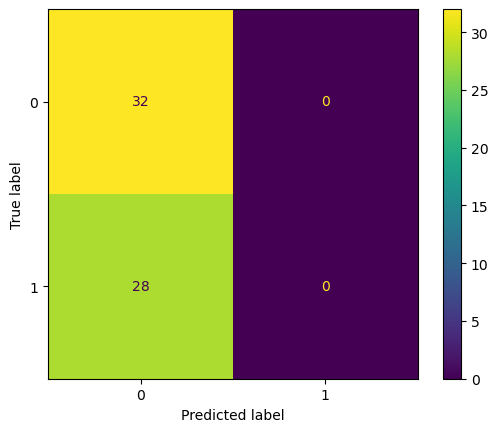

In [52]:
Ht_De_Ptn_tt = Ht_De_Ptn_tme.time()

Ht_De_Ptn_VtmdClr2 = Ht_De_Ptn_VtmdClr.predict(Ht_De_Ptn_Xts)
print(Ht_De_Ptn_Cfrt(Ht_De_Ptn_Yts, Ht_De_Ptn_VtmdClr2))

Ht_De_Ptn_tt1 = Ht_De_Ptn_tme.time()
Ht_De_Ptn_XX = Ht_De_Ptn_Cfmx(Ht_De_Ptn_Yts, Ht_De_Ptn_VtmdClr2)
Ht_De_Ptn_YY = Ht_De_Ptn_Cfmxdy(confusion_matrix = Ht_De_Ptn_XX, display_labels = [0, 1])
Ht_De_Ptn_YY.plot()
print("Time to test:", Ht_De_Ptn_tt1-Ht_De_Ptn_tt)